In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer 
import rcc
# Enable inline plotting
pd.options.display.max_rows=10
%matplotlib inline

In [2]:
#read files from MovieLens dataset
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
tags = pd.read_csv('tags.csv')
links = pd.read_csv('links.csv')
movies.head()


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
userId       100836 non-null int64
movieId      100836 non-null int64
rating       100836 non-null float64
timestamp    100836 non-null int64
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [4]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [6]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [7]:
# Merge files by same movie ID and user ID 
merge1 = pd.merge(ratings,tags, on=['userId','movieId'],how ='left')
merged = pd.merge(merge1,movies,on=['movieId'],how='left')
merged

,userId,movieId,rating,timestamp_x,tag,timestamp_y,title,genres
0,1,1,4.0,964982703,NaN,NaN,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,NaN,NaN,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,NaN,NaN,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,NaN,NaN,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,NaN,NaN,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...,...,...,...
102672,610,166534,4.0,1493848402,NaN,NaN,Split (2017),Drama|Horror|Thriller
102673,610,168248,5.0,1493850091,Heroic Bloodshed,1.493844e+09,John Wick: Chapter Two (2017),Action|Crime|Thriller
102674,610,168250,5.0,1494273047,NaN,NaN,Get Out (2017),Horror
102675,610,168252,5.0,1493846352,NaN,NaN,Logan (2017),Action|Sci-Fi


In [8]:
# EDA
merged.describe()

,userId,movieId,rating,timestamp_x,timestamp_y
count,102677.000000,102677.000000,102677.000000,1.026770e+05,3.476000e+03
mean,327.761933,19742.712623,3.514813,1.209495e+09,1.323525e+09
std,183.211289,35884.400990,1.043133,2.170117e+08,1.731554e+08
min,1.000000,1.000000,0.500000,8.281246e+08,1.137179e+09
25%,177.000000,1199.000000,3.000000,1.019138e+09,1.138032e+09
50%,328.000000,3005.000000,3.500000,1.186590e+09,1.279956e+09
75%,477.000000,8366.000000,4.000000,1.439916e+09,1.498457e+09
max,610.000000,193609.000000,5.000000,1.537799e+09,1.537099e+09


In [9]:
# get a unique list of genre

# combine all the genre in one list
genring = merged['genres'].str.split('|')
all_genres=[]
for alltypes in range(len(genring)):
    all_genres.append(genring[alltypes])

# turn the nested list in a list that contains all the elements
from itertools import chain
all_genres = list(chain.from_iterable(all_genres))
uniq_genre = np.unique(np.array(all_genres))
uniq_genre

array(['(no genres listed)', 'Action', 'Adventure', 'Animation',
       'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western'], dtype='<U18')

In [10]:
# get how many movies in each genre
kw_count = dict()
for s in uniq_genre: kw_count[s]=0
for g in all_genres: 
    kw_count[g] += 1
kw_count

{'(no genres listed)': 49,
 'Action': 31151,
 'Adventure': 24497,
 'Animation': 7119,
 'Children': 9285,
 'Comedy': 39622,
 'Crime': 17224,
 'Documentary': 1259,
 'Drama': 43024,
 'Fantasy': 11989,
 'Film-Noir': 880,
 'Horror': 7408,
 'IMAX': 4258,
 'Musical': 4170,
 'Mystery': 7906,
 'Romance': 18353,
 'Sci-Fi': 17691,
 'Thriller': 27175,
 'War': 4931,
 'Western': 1966}

In [11]:
kw_count = pd.DataFrame.from_dict(kw_count, orient = 'index', columns = ['number of movie'])
kw_count = kw_count.sort_values(by = ['number of movie'])
kw_count.index.names=['genre']
kw_count

,number of movie
genre,
(no genres listed),49
Film-Noir,880
Documentary,1259
Western,1966
Musical,4170
...,...
Adventure,24497
Thriller,27175
Action,31151


In [12]:
kw_count.index

Index(['(no genres listed)', 'Film-Noir', 'Documentary', 'Western', 'Musical',
       'IMAX', 'War', 'Animation', 'Horror', 'Mystery', 'Children', 'Fantasy',
       'Crime', 'Sci-Fi', 'Romance', 'Adventure', 'Thriller', 'Action',
       'Comedy', 'Drama'],
      dtype='object', name='genre')

In [13]:
import plotly
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='Florajiang', api_key='aREKoI0rcSmIKwNfDoR5')
data = [go.Bar(x=kw_count.index,y=kw_count['number of movie'])]
plotly.plotly.iplot(data, filename='Popularity of Genres')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~Florajiang/0 or inside your plot.ly account where it is named 'Popularity of Genres'


In [14]:
# create dummy variables in term of genres
temp = merged.copy()
temp = pd.concat([temp, temp.genres.str.get_dummies(sep='|')],axis =1)
temp 

,userId,movieId,rating,timestamp_x,tag,timestamp_y,title,genres,(no genres listed),Action,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1,4.0,964982703,NaN,NaN,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,3,4.0,964981247,NaN,NaN,Grumpier Old Men (1995),Comedy|Romance,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,6,4.0,964982224,NaN,NaN,Heat (1995),Action|Crime|Thriller,0,1,...,0,0,0,0,0,0,0,1,0,0
3,1,47,5.0,964983815,NaN,NaN,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,0,0,...,0,0,0,0,1,0,0,1,0,0
4,1,50,5.0,964982931,NaN,NaN,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,0,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102672,610,166534,4.0,1493848402,NaN,NaN,Split (2017),Drama|Horror|Thriller,0,0,...,0,1,0,0,0,0,0,1,0,0
102673,610,168248,5.0,1493850091,Heroic Bloodshed,1.493844e+09,John Wick: Chapter Two (2017),Action|Crime|Thriller,0,1,...,0,0,0,0,0,0,0,1,0,0
102674,610,168250,5.0,1494273047,NaN,NaN,Get Out (2017),Horror,0,0,...,0,1,0,0,0,0,0,0,0,0
102675,610,168252,5.0,1493846352,NaN,NaN,Logan (2017),Action|Sci-Fi,0,1,...,0,0,0,0,0,0,1,0,0,0


In [15]:
temp['tag'] = temp.tag.fillna('')
temp.tag.head()

0    
1    
2    
3    
4    
Name: tag, dtype: object

In [16]:
# vectorize the features, feature vctor the tags
vectorizer = TfidfVectorizer(stop_words='english')
X=vectorizer.fit_transform(temp['tag'])
features = pd.DataFrame(X.toarray(),columns = vectorizer.get_feature_names())
features.head()

,06,1900s,1920s,1950s,1960s,1970s,1980s,1990s,2001,250,...,wrongful,wry,york,younger,zellweger,zither,zoe,zombie,zombies,zooey
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
temp = temp.drop(columns=['tag','timestamp_y','genres','title'])
temp.head()

,userId,movieId,rating,timestamp_x,(no genres listed),Action,Adventure,Animation,Children,Comedy,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1,4.0,964982703,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,3,4.0,964981247,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,1,6,4.0,964982224,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,47,5.0,964983815,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,1,50,5.0,964982931,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [18]:
featured = pd.concat([temp, features], axis=1)
featured.head()

,userId,movieId,rating,timestamp_x,(no genres listed),Action,Adventure,Animation,Children,Comedy,...,wrongful,wry,york,younger,zellweger,zither,zoe,zombie,zombies,zooey
0,1,1,4.0,964982703,0,0,1,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,3,4.0,964981247,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,6,4.0,964982224,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,47,5.0,964983815,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,50,5.0,964982931,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
# done with data processing 
# run Kmeans 
from sklearn.cluster import KMeans
# init kmeans 
kmeans = KMeans(n_clusters = 10)
# fitting the inputs 
kmeans = kmeans.fit(featured)


In [21]:
# predict the clusters 
labels = kmeans.predict(featured)

In [22]:
# predict the clusters 
labels[0]

4

In [23]:
# get the cluster center 
C = kmeans.cluster_centers_
C

array([[ 2.86860372e+02,  4.71655425e+02,  3.57294995e+00, ...,
         2.31070588e-18, -1.27597043e-17,  1.15619997e-18],
       [ 3.38720085e+02,  2.61887699e+04,  3.68095620e+00, ...,
         1.85500215e-18, -1.09572182e-17,  9.28348110e-19],
       [ 3.34760460e+02,  4.51911485e+03,  3.46996686e+00, ...,
         2.75285708e-18,  3.10687655e-04,  1.37727557e-18],
       ...,
       [ 3.41713979e+02,  1.02329584e+04,  3.37244374e+00, ...,
         3.05778894e-18, -1.57141552e-17,  1.52974150e-18],
       [ 3.06571595e+02,  2.91317171e+03,  3.55227008e+00, ...,
         2.36830412e-18, -1.29833210e-17,  1.18499909e-18],
       [ 3.55283082e+02,  2.16478823e+04,  3.55674204e+00, ...,
        -4.13352078e-19,  2.09380235e-04,  1.48054184e-04]])

In [24]:
# to print the clusters
clustersvdf=kmeans.fit_predict(featured)
#print clusters.shape
cluster_0=np.where(clustersvdf==0)
print(cluster_0)

(array([  1440,   1442,   1446, ..., 102674, 102675, 102676]),)


In [25]:
abc = list(cluster_0)[0]
abc

array([  1440,   1442,   1446, ..., 102674, 102675, 102676])

In [26]:
merged.iloc[abc]

,userId,movieId,rating,timestamp_x,tag,timestamp_y,title,genres
1440,15,1,2.5,1510577970,NaN,NaN,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1442,15,47,3.5,1510571970,NaN,NaN,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
1446,15,260,5.0,1510571946,NaN,NaN,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi
1447,15,293,3.0,1510571962,NaN,NaN,Léon: The Professional (a.k.a. The Professiona...,Action|Crime|Drama|Thriller
1448,15,296,4.0,1510571877,NaN,NaN,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
...,...,...,...,...,...,...,...,...
102672,610,166534,4.0,1493848402,NaN,NaN,Split (2017),Drama|Horror|Thriller
102673,610,168248,5.0,1493850091,Heroic Bloodshed,1.493844e+09,John Wick: Chapter Two (2017),Action|Crime|Thriller
102674,610,168250,5.0,1494273047,NaN,NaN,Get Out (2017),Horror
102675,610,168252,5.0,1493846352,NaN,NaN,Logan (2017),Action|Sci-Fi


In [27]:
#top 50 movies
merged.iloc[abc]['title'].unique()[:50]

array(['Toy Story (1995)', 'Seven (a.k.a. Se7en) (1995)',
       'Star Wars: Episode IV - A New Hope (1977)',
       'Léon: The Professional (a.k.a. The Professional) (Léon) (1994)',
       'Pulp Fiction (1994)', 'Shawshank Redemption, The (1994)',
       'Forrest Gump (1994)', 'Lion King, The (1994)',
       "Schindler's List (1993)", 'Aladdin (1992)',
       'Terminator 2: Judgment Day (1991)', 'Pinocchio (1940)',
       'Independence Day (a.k.a. ID4) (1996)', 'Godfather, The (1972)',
       'Star Wars: Episode V - The Empire Strikes Back (1980)',
       'Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)',
       'Aliens (1986)',
       'Star Wars: Episode VI - Return of the Jedi (1983)',
       'Alien (1979)', 'Terminator, The (1984)', 'Groundhog Day (1993)',
       'Back to the Future (1985)', 'Fifth Element, The (1997)',
       'Gattaca (1997)', 'Back to the Future Part II (1989)',
       'Back to the Future Part III (1990)', 'Saving Private Ryan (1998

In [19]:
featured = featured.drop(columns='timestamp_x')
featured.head()

,userId,movieId,rating,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,wrongful,wry,york,younger,zellweger,zither,zoe,zombie,zombies,zooey
0,1,1,4.0,0,0,1,1,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,3,4.0,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,6,4.0,0,1,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,47,5.0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,50,5.0,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
kmeans2 =KMeans(n_clusters=20)
kmeans2 = kmeans.fit(featured)
labels2=kmeans2.predict(featured)


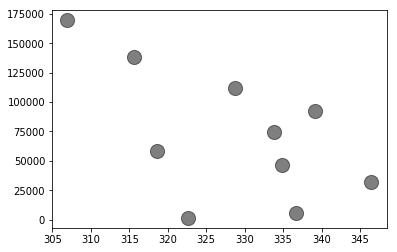

In [30]:
centers = kmeans2.cluster_centers_
plt.scatter(centers[:,0], centers[:,1],c='black',s=200,alpha=0.5)

In [31]:
clustersTemp =kmeans2.fit_predict(featured)
cluster_02 =np.where(clustersTemp==0)
print(cluster_02)

(array([     0,      1,      2, ..., 101568, 101569, 101570]),)


In [32]:
# top 10 movies
merged.iloc[list(cluster_02)[0]]['title'].unique()[:10]

array(['Toy Story (1995)', 'Grumpier Old Men (1995)', 'Heat (1995)',
       'Seven (a.k.a. Se7en) (1995)', 'Usual Suspects, The (1995)',
       'From Dusk Till Dawn (1996)', 'Bottle Rocket (1996)',
       'Braveheart (1995)', 'Rob Roy (1995)', 'Canadian Bacon (1995)'],
      dtype=object)

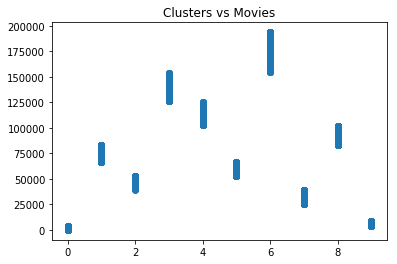

In [33]:
plt.title("Clusters vs Movies")
plt.scatter(clustersTemp,merged['movieId'])

In [21]:
import rcc
from sklearn.metrics import adjusted_mutual_info_score

X = []
Y = []

copyftd = featured.copy()
X = copyftd.values


type(X)

numpy.ndarray

In [27]:
from scipy import sparse
sp_x=sparse.coo_matrix(X)


In [28]:
X = sp_x.toarray()

In [29]:
type(X)

numpy.ndarray

In [30]:
clusterer = rcc.RccCluster(measure='cosine')

In [ ]:
P = clusterer.fit(X)